# Regressão

### Importação as bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score


### Análise da base

In [2]:
df = pd.read_csv('stats1.csv')
df.columns

Index(['id', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')

## Primeira regressão proposta

1- Estimar o gold do time de acordo com o número de objetivos, farm, kills feitos, além do tempo de partida.

Para este problema vamos avaliar o resultado da regressão, primeiramente, com somente a variável 'kills', depois somente 'número de objetivos' e, posteriormente, com tudo o que foi comentado acima. Essa separação tem como objetivo avaliar qual é o impacto de se utilizar mais variáveis relacionadas no resultado final, que será o erro qaudrático médio. 

Para os dois primeiros experimentos, a reta de regressão é plotada para que possamos analisar se a regrssão foi satisfatória.

### Definindo a entrada e a saída do problema a ser analisado

In [3]:
X = df[['kills', 'turretkills', 'totminionskilled', 'inhibkills','wardskilled']]
# X = df[['kills']]
y = df['goldearned']

### Separando as variáveis em treino e teste, além da definição do número de amostras

In [4]:
samples = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:samples], y[:samples], test_size = 0.2)

### Normalização dos dados

In [5]:
mean_train = X_train.mean()
std_train = X_train.std(ddof=1)

Z_train = X_train.copy()
Z_train = Z_train - mean_train
Z_train = Z_train/std_train

Z_test = X_test.copy()
Z_test = Z_test - mean_train
Z_test = Z_test/std_train

### Validação com KFolds

In [6]:
numberOfFolds = 10
skf = KFold(n_splits=numberOfFolds, shuffle = True)
error_mean = []
fold = 1
for train_index, val_index in skf.split(Z_train, y_train):
    # print('{}º fold'.format(fold))
    clf = LinearRegression()
    clf.fit(Z_train.values[train_index], y_train.values[train_index])
    y_val = y_train.values[val_index]
    y_hat = clf.predict(Z_train.values[val_index])
    error_mean.append(round(((y_val - y_hat)**2).mean(), 2))
    # print('Erro Quadrado médio: {}'.format(error_mean[fold-1]))
    # print('')
    fold += 1

In [7]:
# Funções para plotar os gráficos
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
                    
def plotBars(roundedMetricRL, title, metricLabel):
    fig, ax = plt.subplots()
    rects = ax.bar(x - width/2, roundedMetricRL , width)
    # rects1 = ax.bar(x + width/2, roundedMetricKNN , width, label='KNN')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    fig.set_size_inches(12,8)
    ax.set_ylabel(metricLabel)
    ax.set_title('{}'.format(title))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    # ax.legend()
    autolabel(rects, ax)
    # autolabel(rects2, ax)
    fig.tight_layout()

In [8]:
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10']
x = np.arange(len(labels))
width = 0.35

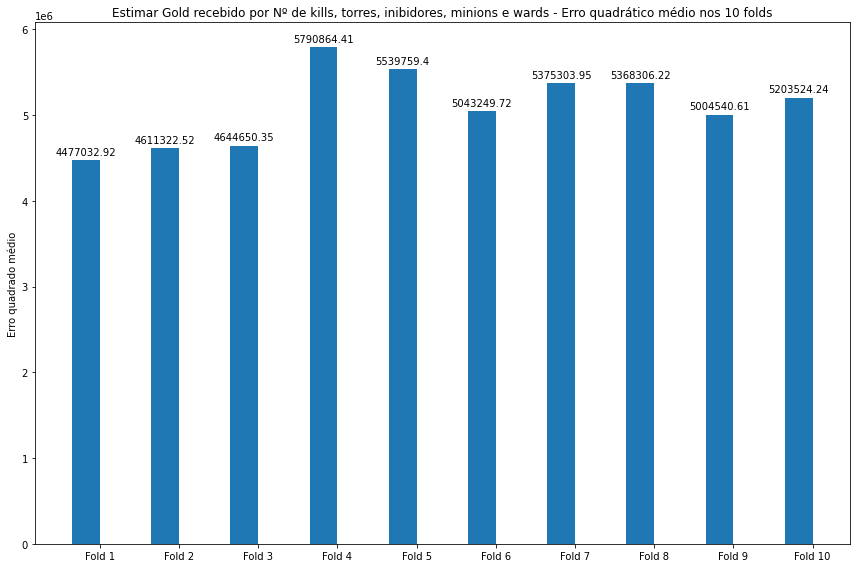

In [9]:
plotBars(error_mean, 'Estimar {} por {} - Erro quadrático médio nos {} folds'.format('Gold recebido', 'Nº de kills, torres, inibidores, minions e wards', numberOfFolds), 'Erro quadrado médio')

### Aplicando a regresssão linear

In [10]:
clf = LinearRegression()
clf.fit(Z_train.values, y_train.values)

y_val = Z_test.values
y_hat = clf.predict(Z_test.values)


In [11]:
def calculate_LinearRegression(X_train, y_train, X_test, y_test, columnToPrint, resultLabel):
    clf = LinearRegression()
    clf.fit(X_train.values, y_train.values)
    y_val = y_test.values
    y_hat = clf.predict(X_test.values)

    error_mean = ((y_val - y_hat)**2).mean()

    slope = clf.coef_[0]
    intercept = clf.intercept_
    plt.figure(figsize=(12,8))
    plt.scatter(X_test[columnToPrint], y_val, marker='.', lw=2)
    plt.xlabel("{} ( normalizada(o) )".format(columnToPrint))
    plt.ylabel(resultLabel)
    plt.title("Estimar {} pela(o) {}".format(resultLabel, columnToPrint))
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    
    y_vals = intercept + slope* x_vals
    plt.plot(x_vals, y_vals, '--', color='r', lw=6)
    plt.tight_layout()
    print("O erro quadrático médio é {}".format(round(error_mean, 1) ))
    print()


O erro quadrático médio é 5243793.1



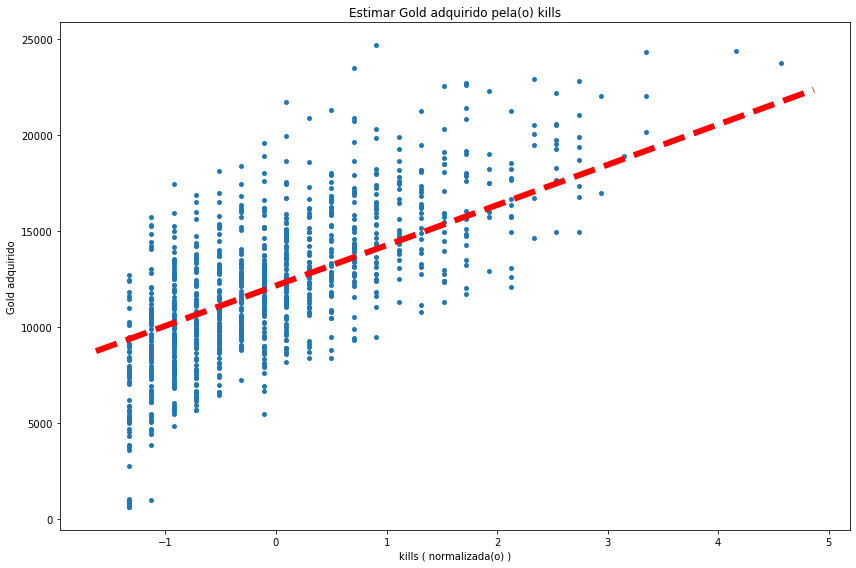

In [12]:
calculate_LinearRegression(Z_train, y_train, Z_test, y_test, "kills", "Gold adquirido")

In [79]:
# clf.coef_

In [80]:
# intercept = clf.intercept_

In [102]:

# plt.scatter(X_test['totminionskilled'][:samples], y_hat[:samples], label="1")

# slope = clf.coef_[0]



# plt.scatter(X_test['kills'], y_val, marker='.')
# axes = plt.gca()
# x_vals = np.array(axes.get_xlim())
# y_vals = intercept + slope* x_vals
# print(y_vals.shape)
# plt.plot(x_vals, y_vals, '--', color='r')

## Segunda regressão proposta

2- Estimar a quantidade de kills, assistências e mortes de um campeão de acordo com gold recebido.

### Definindo a entrada e a saída do problema a ser analisado

In [135]:
X = df[['goldspent']]
y = df['deaths']

### Separando os dados em treino e teste

In [136]:
samples = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:samples], y[:samples], test_size = 0.2)

### Normalização dos dados

In [137]:
mean_train = X_train.mean()
std_train = X_train.std(ddof=1)

Z_train = X_train.copy()
Z_train = X_train - mean_train
Z_train = Z_train/std_train

Z_test = X_test.copy()
Z_test = Z_test - mean_train
Z_test = Z_test/std_train

### Validação com KFolds

In [138]:
numberOfFolds = 10
skf = KFold(n_splits=numberOfFolds, shuffle = True)
error_mean_02 = []
fold = 1
for train_index, val_index in skf.split(Z_train, y_train):
    # print('{}º fold'.format(fold))
    clf = LinearRegression()
    clf.fit(Z_train.values[train_index], y_train.values[train_index])
    y_val = y_train.values[val_index]
    y_hat = clf.predict(Z_train.values[val_index])
    error_mean_02.append(round(((y_val - y_hat)**2).mean(), 2))
    # print('Erro Quadrado médio: {}'.format(error_mean[fold-1]))
    # print('')
    fold += 1

### Plota erro quadrático médio entre os folds

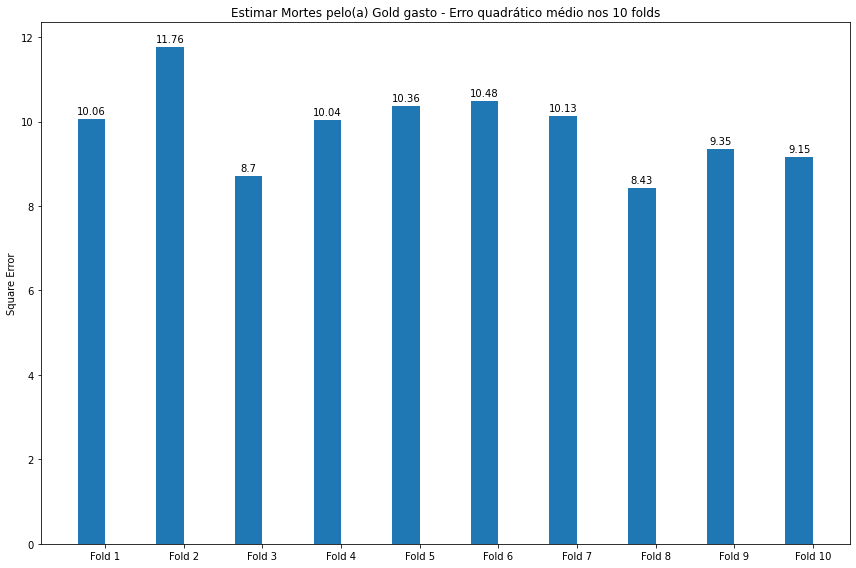

In [140]:
plotBars(error_mean_02, 'Estimar {} pelo(a) {} - Erro quadrático médio nos {} folds'.format('Mortes', 'Gold gasto', numberOfFolds), 'Square Error')

### Aplica a função criada para a regressão

O erro quadrático médio é 9.8



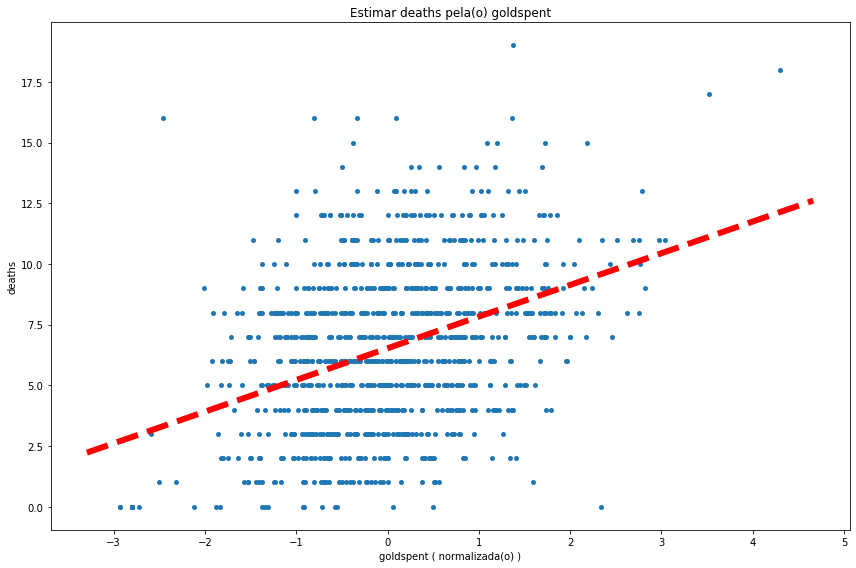

In [141]:
calculate_LinearRegression(Z_train, y_train, Z_test , y_test, "goldspent", "deaths")

In [101]:
# clf = LinearRegression()
# clf.fit(X_train.values, y_train.values)
# y_val = y_test.values
# y_hat = clf.predict(X_test.values)
# error_mean = ((y_val - y_hat)**2).mean()
# error_mean

In [100]:
# intercept = clf.intercept_

In [99]:

# slope = clf.coef_[0]


# plt.scatter(X_test['goldspent'], y_val, marker='.')
# plt.xlabel('Gold gasto')
# plt.ylabel('Deaths')
# axes = plt.gca()
# x_vals = np.array(axes.get_xlim())
# y_vals = intercept + slope* x_vals
# print(y_vals.shape)
# plt.plot(x_vals, y_vals, '--', color='r')